# **1. Perkenalan Dataset**


Tahap pertama, Anda harus mencari dan menggunakan dataset dengan ketentuan sebagai berikut:

1. **Sumber Dataset**:  
   Dataset dapat diperoleh dari berbagai sumber, seperti public repositories (*Kaggle*, *UCI ML Repository*, *Open Data*) atau data primer yang Anda kumpulkan sendiri.

   https://www.kaggle.com/datasets/arunavakrchakraborty/australia-weather-data


# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning atau deep learning.

In [105]:
import pandas as pd
import seaborn as sns
import numpy as np
from matplotlib import pyplot as plt
from sklearn.preprocessing import MinMaxScaler, RobustScaler, StandardScaler, OrdinalEncoder, OneHotEncoder, PowerTransformer
from sklearn.compose import ColumnTransformer, make_column_selector
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from scipy.stats import skew

# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

Jika dataset berupa unstructured data, silakan sesuaikan dengan format seperti kelas Machine Learning Pengembangan atau Machine Learning Terapan

In [ ]:
df_training = pd.read_csv("../weather_raw/Weather Training Data.csv")

# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

In [3]:
df_training.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99516 entries, 0 to 99515
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   row ID         99516 non-null  object 
 1   Location       99516 non-null  object 
 2   MinTemp        99073 non-null  float64
 3   MaxTemp        99286 non-null  float64
 4   Rainfall       98537 non-null  float64
 5   Evaporation    56985 non-null  float64
 6   Sunshine       52199 non-null  float64
 7   WindGustDir    92995 non-null  object 
 8   WindGustSpeed  93036 non-null  float64
 9   WindDir9am     92510 non-null  object 
 10  WindDir3pm     96868 non-null  object 
 11  WindSpeed9am   98581 non-null  float64
 12  WindSpeed3pm   97681 non-null  float64
 13  Humidity9am    98283 non-null  float64
 14  Humidity3pm    97010 non-null  float64
 15  Pressure9am    89768 non-null  float64
 16  Pressure3pm    89780 non-null  float64
 17  Cloud9am       61944 non-null  float64
 18  Cloud3

In [4]:
df_training.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainTomorrow
count,99073.000000,99286.000000,98537.000000,56985.00000,52199.000000,93036.000000,98581.000000,97681.000000,98283.000000,97010.000000,89768.000000,89780.000000,61944.000000,59514.000000,98902.000000,97612.000000,99516.000000
mean,12.176266,23.218513,2.353024,5.46132,7.615090,39.976966,14.004849,18.650464,68.866376,51.433296,1017.684638,1015.286204,4.447985,4.519122,16.970041,21.681340,0.224677
std,6.390882,7.115072,8.487866,4.16249,3.783008,13.581524,8.902323,8.801827,19.074951,20.777616,7.110166,7.045189,2.886580,2.716618,6.488961,6.931681,0.417372
min,-8.500000,-4.100000,0.000000,0.00000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.500000,978.200000,0.000000,0.000000,-7.000000,-5.100000,0.000000
25%,7.600000,17.900000,0.000000,2.60000,4.800000,31.000000,7.000000,13.000000,57.000000,37.000000,1013.000000,1010.500000,1.000000,2.000000,12.300000,16.600000,0.000000
50%,12.000000,22.600000,0.000000,4.80000,8.400000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.700000,1015.300000,5.000000,5.000000,16.700000,21.100000,0.000000
75%,16.800000,28.200000,0.800000,7.40000,10.600000,48.000000,19.000000,24.000000,83.000000,65.000000,1022.400000,1020.000000,7.000000,7.000000,21.500000,26.400000,0.000000
max,33.900000,48.100000,371.000000,86.20000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.000000,1039.600000,9.000000,9.000000,40.200000,46.700000,1.000000


In [5]:
df_training.isnull().sum()

row ID               0
Location             0
MinTemp            443
MaxTemp            230
Rainfall           979
Evaporation      42531
Sunshine         47317
WindGustDir       6521
WindGustSpeed     6480
WindDir9am        7006
WindDir3pm        2648
WindSpeed9am       935
WindSpeed3pm      1835
Humidity9am       1233
Humidity3pm       2506
Pressure9am       9748
Pressure3pm       9736
Cloud9am         37572
Cloud3pm         40002
Temp9am            614
Temp3pm           1904
RainToday          979
RainTomorrow         0
dtype: int64

Evaporation, Sunshine, Cloud9am, Cloud3pm memiliki banyak data hilang. Pilihan antara imputasi atau hapus kolom (bergantung pada korelasi).

In [6]:
df_training.duplicated().sum()

np.int64(0)

In [7]:
df_training["RainTomorrow"].value_counts()

RainTomorrow
0    77157
1    22359
Name: count, dtype: int64

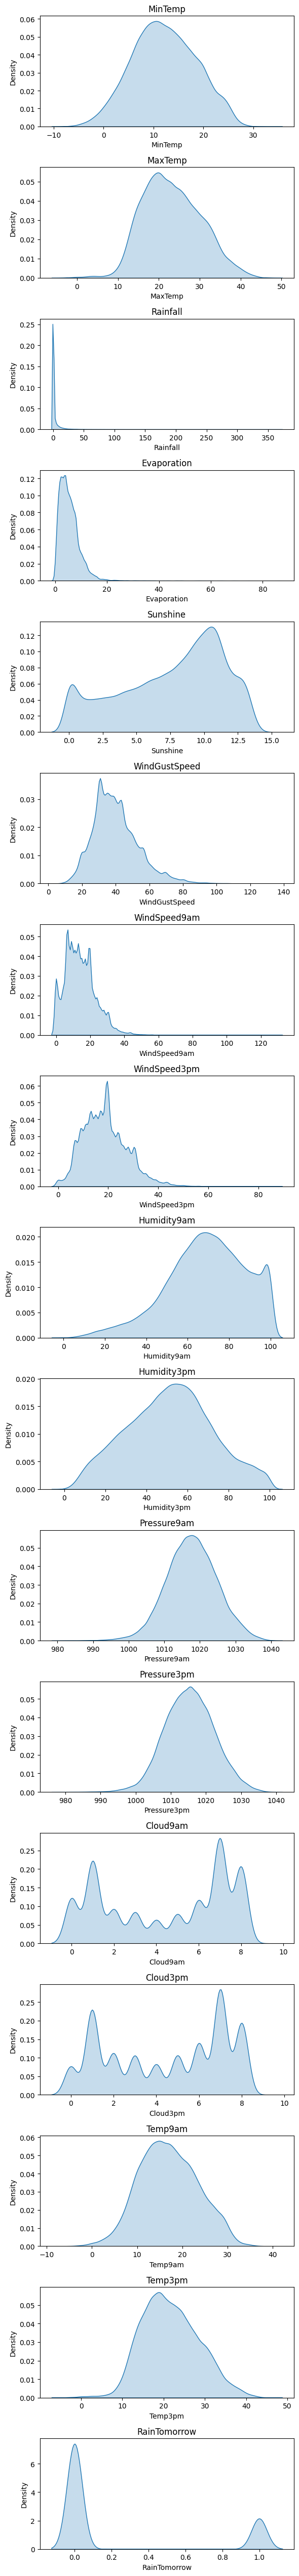

In [8]:
cols = df_training.select_dtypes(include="number").columns
n = len(cols)

fig, axes = plt.subplots(n, 1, figsize=(6, 3*n))

for ax, col in zip(axes, cols):
    sns.kdeplot(df_training[col], ax=ax, fill=True)
    ax.set_title(col)

plt.tight_layout()
plt.show()

In [9]:
df_training.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99516 entries, 0 to 99515
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   row ID         99516 non-null  object 
 1   Location       99516 non-null  object 
 2   MinTemp        99073 non-null  float64
 3   MaxTemp        99286 non-null  float64
 4   Rainfall       98537 non-null  float64
 5   Evaporation    56985 non-null  float64
 6   Sunshine       52199 non-null  float64
 7   WindGustDir    92995 non-null  object 
 8   WindGustSpeed  93036 non-null  float64
 9   WindDir9am     92510 non-null  object 
 10  WindDir3pm     96868 non-null  object 
 11  WindSpeed9am   98581 non-null  float64
 12  WindSpeed3pm   97681 non-null  float64
 13  Humidity9am    98283 non-null  float64
 14  Humidity3pm    97010 non-null  float64
 15  Pressure9am    89768 non-null  float64
 16  Pressure3pm    89780 non-null  float64
 17  Cloud9am       61944 non-null  float64
 18  Cloud3

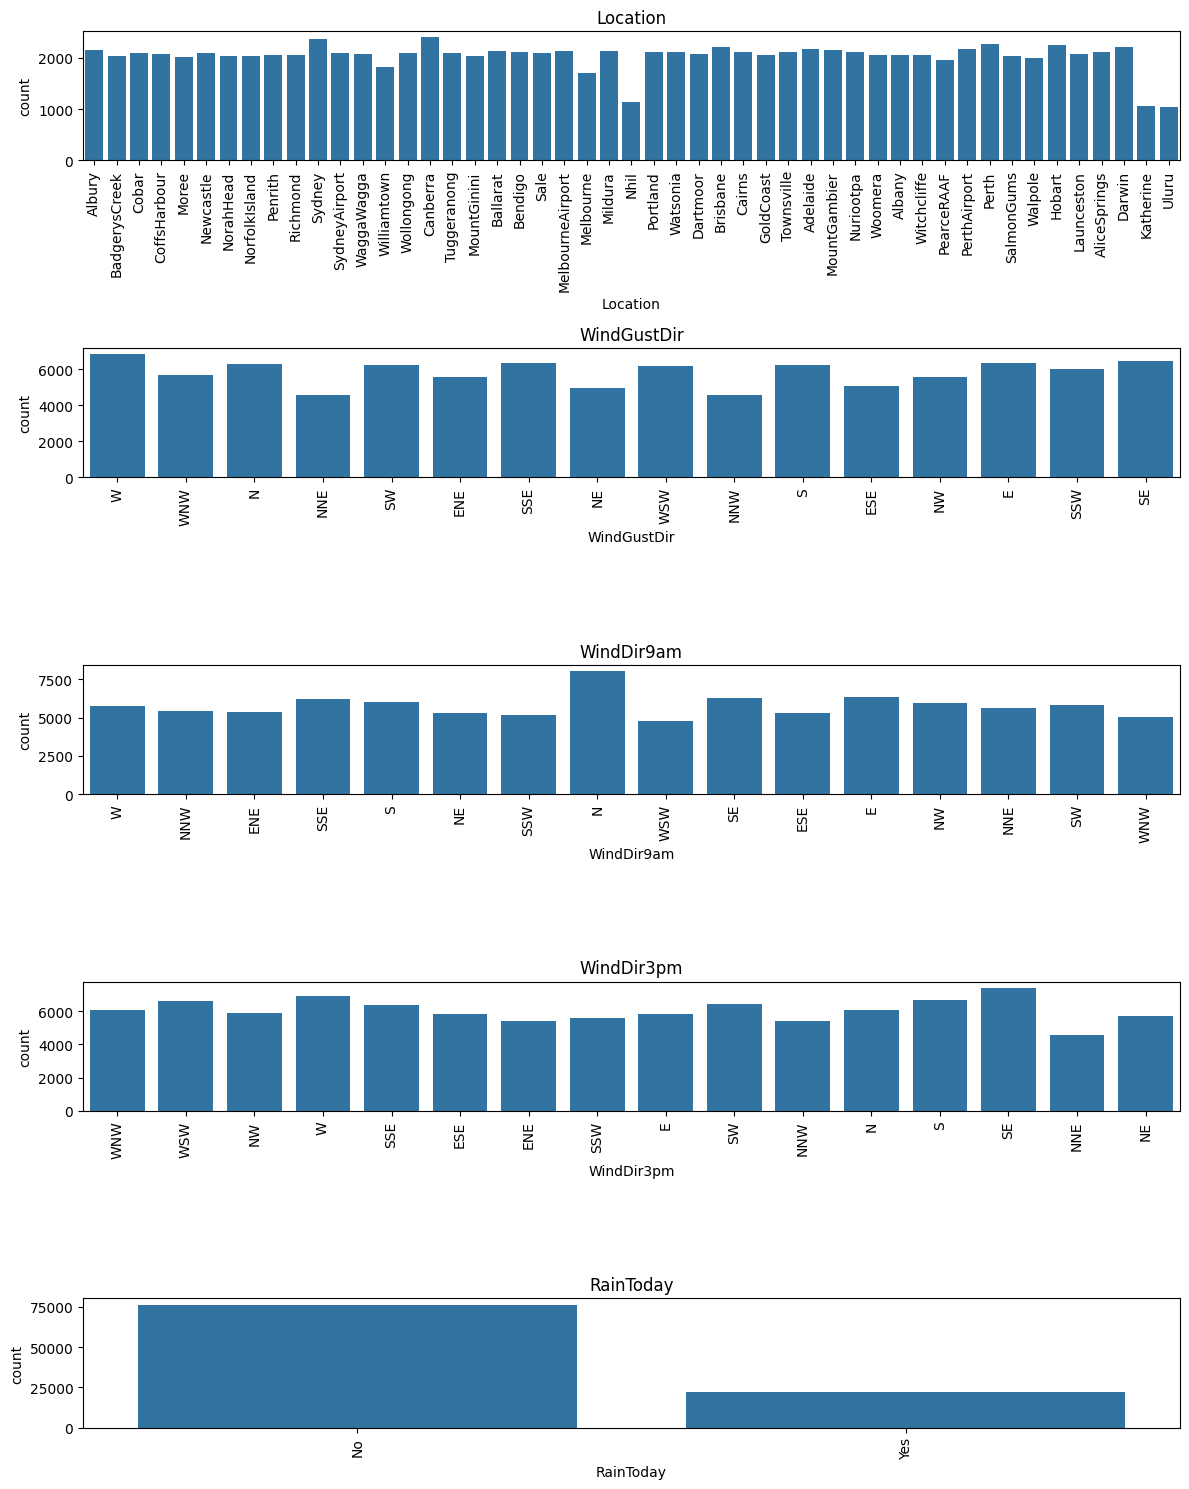

In [10]:
cols = df_training.drop(columns=["row ID"]).select_dtypes(include="object").columns
n = len(cols)

fig, axes = plt.subplots(n, 1, figsize=(12, 3*n))

for ax, col in zip(axes, cols):
    sns.countplot(data=df_training, x=col, ax=ax, fill=True)
    ax.tick_params(axis='x', labelrotation=90)
    ax.set_title(col)

plt.tight_layout()
plt.show()

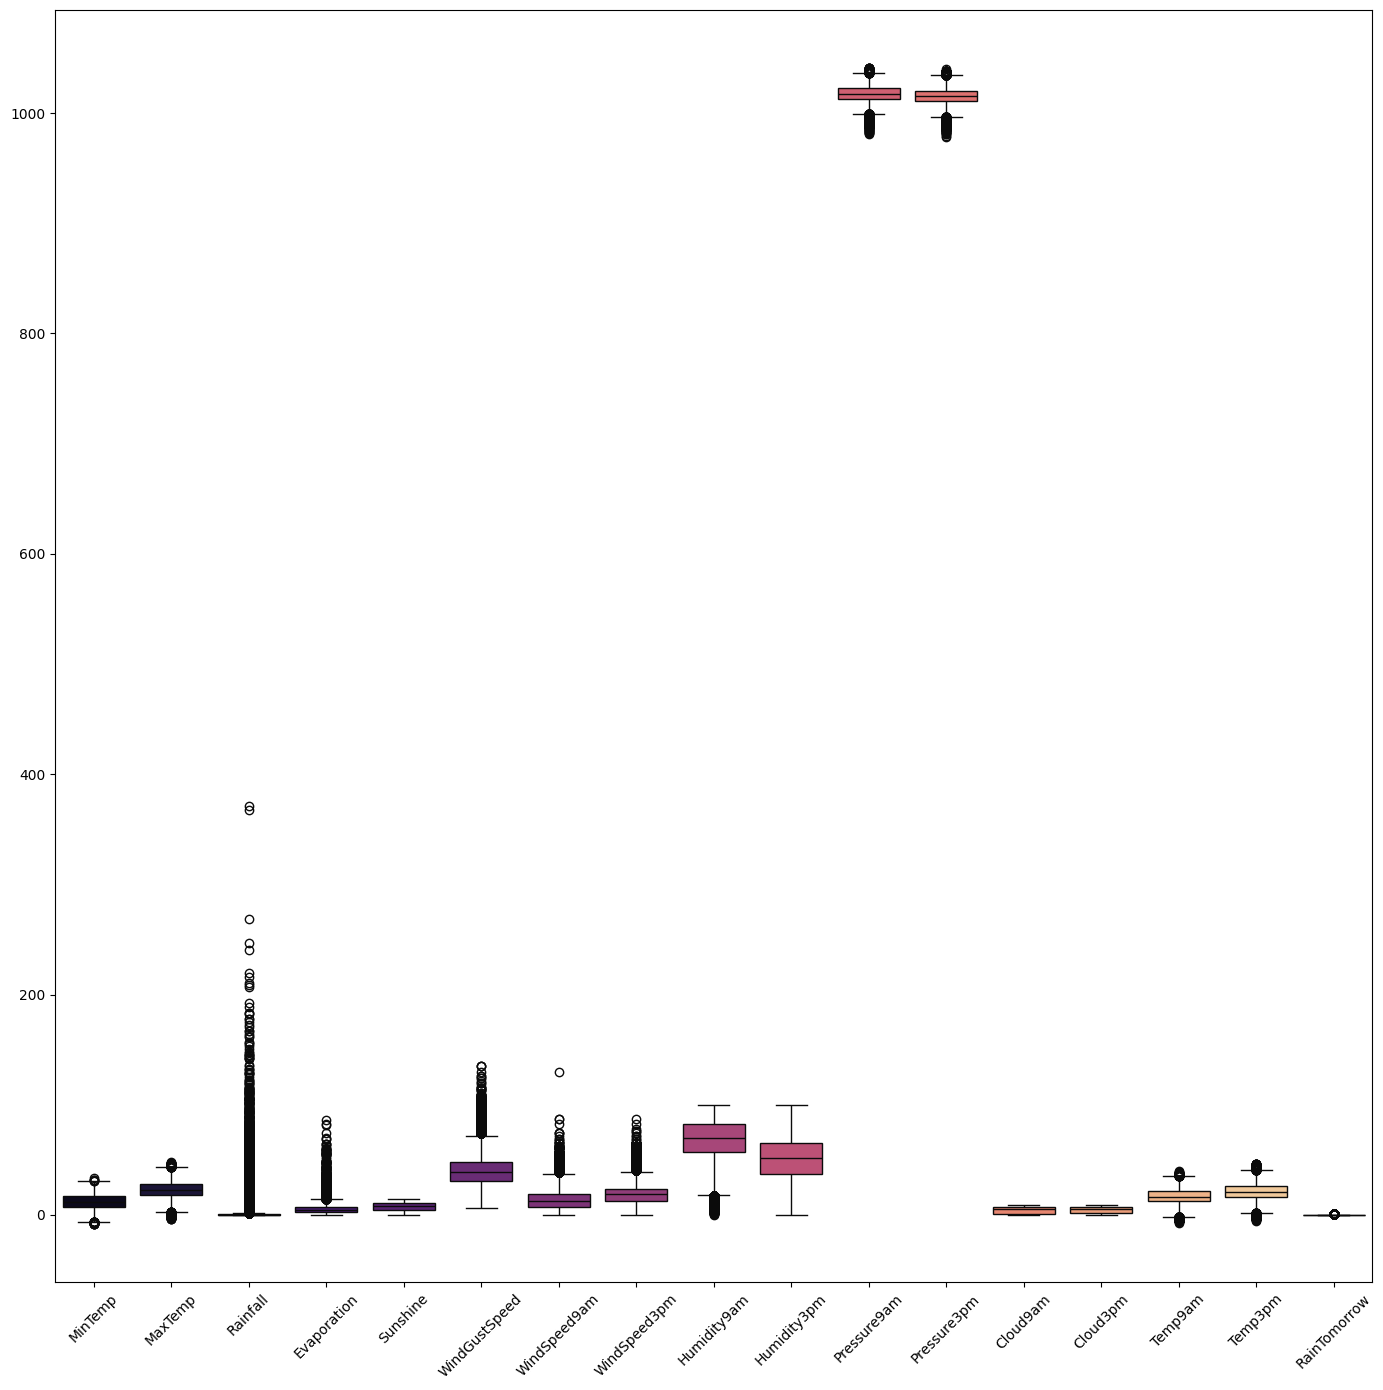

In [11]:
plt.figure(figsize=(14, 14))
sns.boxplot(data=df_training, palette='magma')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

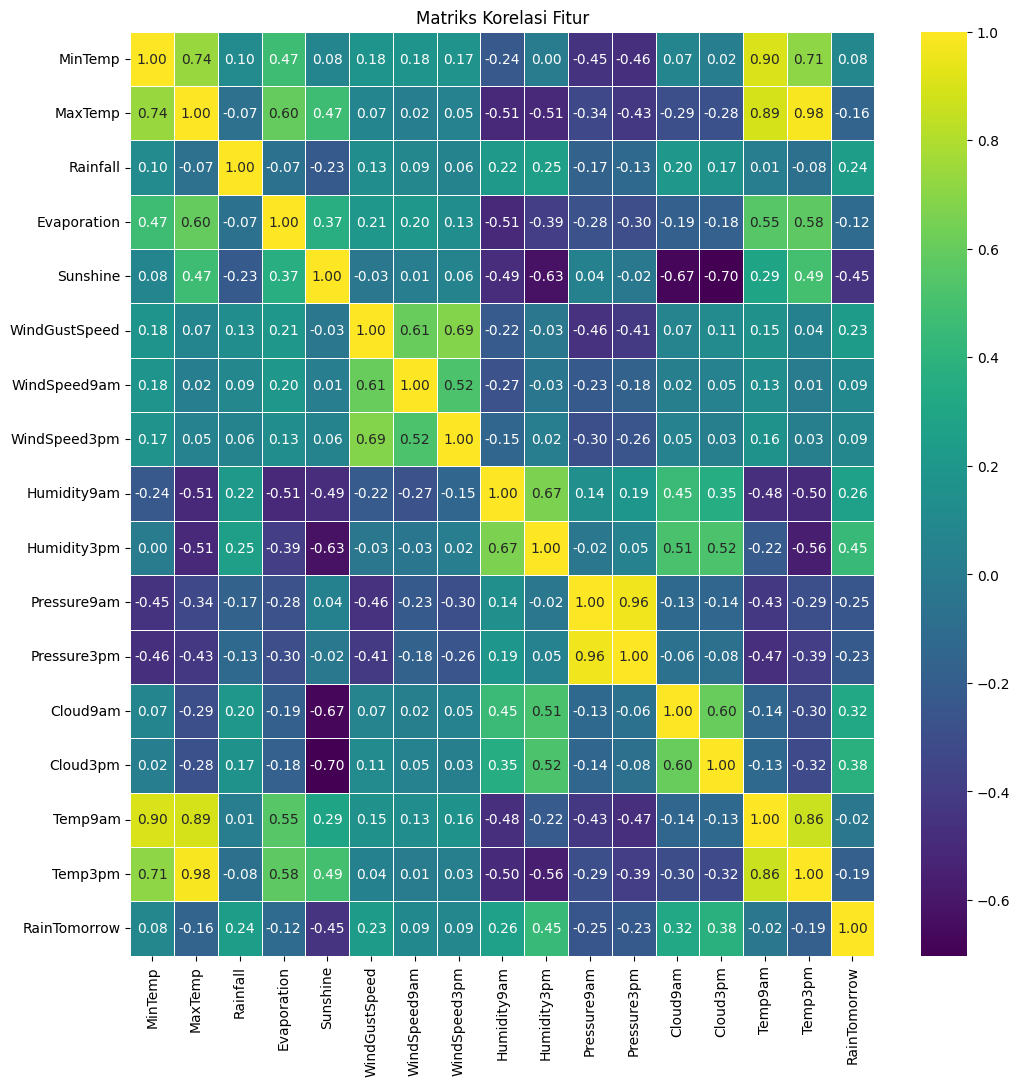

In [12]:
plt.figure(figsize=(12, 12))
sns.heatmap(df_training.drop(columns=["row ID", "Location", "WindGustDir", "WindDir9am", "WindDir3pm", "RainToday"]).corr(), 
            annot=True,  
            cmap='viridis',      
            fmt=".2f",         
            linewidths=.5)

plt.title('Matriks Korelasi Fitur')
plt.show()

MinTemp berkorelasi sangat tinggi dengan Temp9am. Hapus Temp9am.

MaxTemp berkorelasi sangat tinggi dengan Temp3pm. Hapus Temp3pm.

Pressure9am berkorelasi sangat tinggi Pressure3pm. Hapus Pressure9am.

Evaporation, Sunshine, Cloud9am, Cloud3pm memiliki korelasi sedang-tinggi dengan RainTomorrow, artinya imputasi.

# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning.

Jika Anda menggunakan data teks, data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah. Khususnya ketika kami menggunakan data tidak terstruktur.

In [154]:
df_cleaned = df_training.copy().drop(columns=["Temp9am", "Temp3pm", "Pressure9am", "row ID"])

In [155]:
X, y = df_cleaned.drop(columns=["RainTomorrow"]), df_cleaned["RainTomorrow"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [156]:
# for feature in df_cleaned.select_dtypes(include=np.number):
#     df_cleaned[feature] = df_cleaned[feature].fillna(df_cleaned[feature].median())
# for feature in df_cleaned.select_dtypes(exclude=np.number):
#     df_cleaned[feature] = df_cleaned[feature].fillna(df_cleaned[feature].mode()[0])

imputer = ColumnTransformer([
    ("mediam_imputer", SimpleImputer(strategy="median"),
     make_column_selector(dtype_include=np.number)),
    ("mode_imputer", SimpleImputer(strategy="most_frequent"),
     make_column_selector(dtype_exclude=np.number))
], verbose_feature_names_out=False).set_output(transform='pandas')

X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)

In [157]:
print("Train")
display(X_train.isnull().sum())
print("Test")
display(X_test.isnull().sum())

Train


MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustSpeed    0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Location         0
WindGustDir      0
WindDir9am       0
WindDir3pm       0
RainToday        0
dtype: int64

Test


MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustSpeed    0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Location         0
WindGustDir      0
WindDir9am       0
WindDir3pm       0
RainToday        0
dtype: int64

In [158]:
# bell_shaped = [
#     "MinTemp", "MaxTemp", "WindGustSpeed", "WindSpeed9am", "WindSpeed3pm", 
#     "Humidity9am", "Humidity3pm", "Pressure3pm"
# ]
# skewed = ["Rainfall", "Evaporation", "Sunshine"]
# limited = ["Cloud9am", "Cloud3pm"]

# standard_scaler = StandardScaler()
# robust_scaler = RobustScaler()
# minmax_scaler = MinMaxScaler()

# df_cleaned[bell_shaped] = standard_scaler.fit_transform(df_cleaned[bell_shaped])
# df_cleaned[skewed] = robust_scaler.fit_transform(df_cleaned[skewed])
# df_cleaned[limited] = minmax_scaler.fit_transform(df_cleaned[limited])
transformer = PowerTransformer(method="yeo-johnson")

all_numeric = X_train.select_dtypes(include=np.number).columns
X_train[all_numeric] = transformer.fit_transform(X_train[all_numeric])
X_test[all_numeric] = transformer.transform(X_test[all_numeric])


In [159]:
display(X_train.describe())

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure3pm,Cloud9am,Cloud3pm
count,7.463700e+04,7.463700e+04,7.463700e+04,7.463700e+04,7.463700e+04,7.463700e+04,7.463700e+04,7.463700e+04,7.463700e+04,7.463700e+04,7.463700e+04,7.463700e+04,7.463700e+04
mean,1.919228e-16,-4.398231e-16,-7.539824e-17,7.482704e-16,-1.942076e-16,-3.836552e-16,-8.015823e-17,1.888764e-16,-8.529902e-17,-2.437115e-16,-2.493092e-15,-1.016734e-16,4.622902e-16
std,1.000007e+00,1.000007e+00,1.000007e+00,1.000007e+00,1.000007e+00,1.000007e+00,1.000007e+00,1.000007e+00,1.000007e+00,1.000007e+00,1.000007e+00,1.000007e+00,1.000007e+00
min,-3.625056e+00,-5.211207e+00,-6.722899e-01,-3.365917e+00,-2.237644e+00,-4.161908e+00,-2.086440e+00,-2.970349e+00,-2.637612e+00,-2.734154e+00,-5.330926e+00,-1.854636e+00,-1.963827e+00
25%,-7.047972e-01,-7.206173e-01,-6.722899e-01,-2.857183e-01,-6.901898e-02,-6.333707e-01,-7.217576e-01,-5.899275e-01,-6.923891e-01,-6.808059e-01,-6.437288e-01,-7.939118e-01,-4.227641e-01
50%,-1.341703e-02,-4.604796e-02,-6.722899e-01,4.273478e-02,5.755634e-02,4.927619e-02,2.641208e-02,1.305637e-01,-6.842648e-03,5.398075e-02,-2.917450e-03,8.955263e-02,6.968894e-02
75%,7.258600e-01,7.102599e-01,7.468646e-01,2.651631e-01,1.435836e-01,5.652840e-01,6.472158e-01,6.673856e-01,7.433073e-01,6.717381e-01,6.138730e-01,5.684155e-01,5.938735e-01
max,3.283681e+00,3.246259e+00,1.926943e+00,7.742913e+00,2.999789e+00,4.497800e+00,7.219563e+00,5.272575e+00,1.813005e+00,2.274038e+00,3.515216e+00,2.125258e+00,2.330315e+00


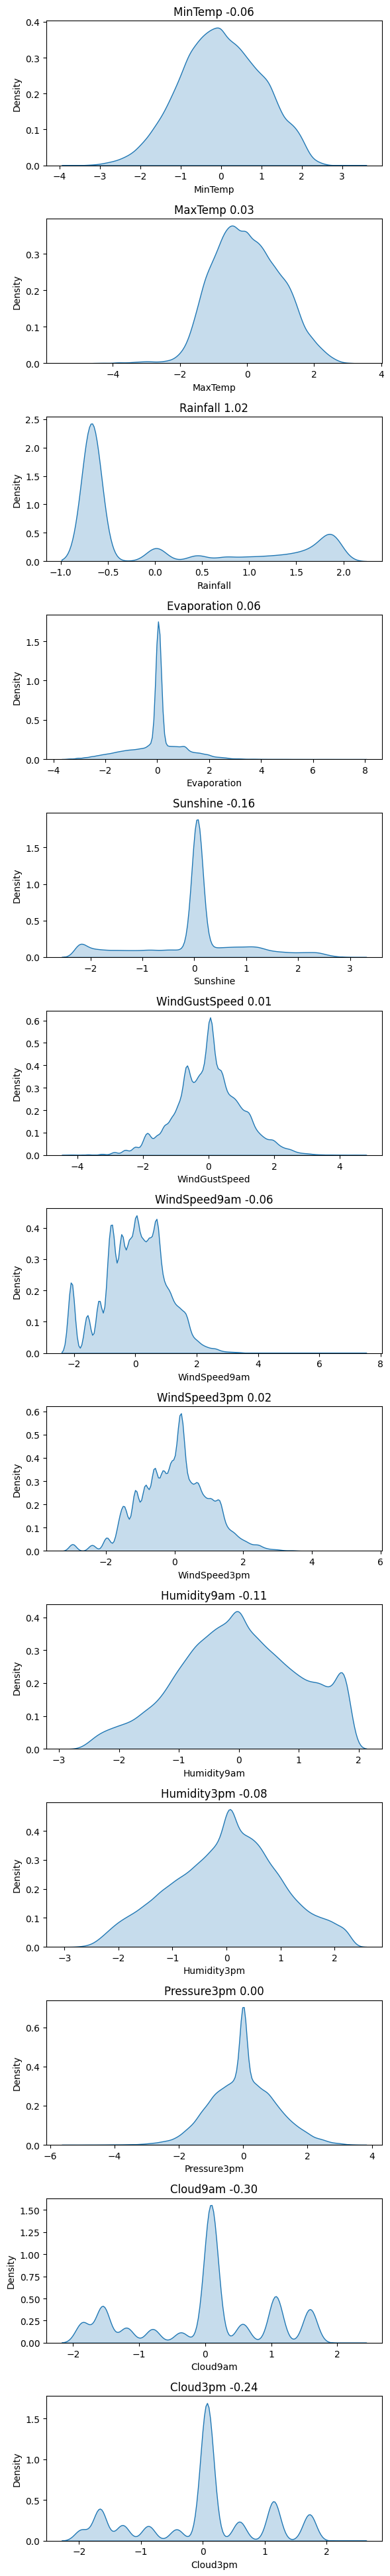

In [160]:
cols = X_train.select_dtypes(include="number").columns
n = len(cols)

fig, axes = plt.subplots(n, 1, figsize=(6, 3*n))

for ax, col in zip(axes, cols):
    sns.kdeplot(X_train[col], ax=ax, fill=True)
   
    ax.set_title(f"{col} {skew(X_train[col].to_numpy()):.2f}")

plt.tight_layout()
plt.show()

In [161]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 74637 entries, 98715 to 15795
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MinTemp        74637 non-null  float64
 1   MaxTemp        74637 non-null  float64
 2   Rainfall       74637 non-null  float64
 3   Evaporation    74637 non-null  float64
 4   Sunshine       74637 non-null  float64
 5   WindGustSpeed  74637 non-null  float64
 6   WindSpeed9am   74637 non-null  float64
 7   WindSpeed3pm   74637 non-null  float64
 8   Humidity9am    74637 non-null  float64
 9   Humidity3pm    74637 non-null  float64
 10  Pressure3pm    74637 non-null  float64
 11  Cloud9am       74637 non-null  float64
 12  Cloud3pm       74637 non-null  float64
 13  Location       74637 non-null  object 
 14  WindGustDir    74637 non-null  object 
 15  WindDir9am     74637 non-null  object 
 16  WindDir3pm     74637 non-null  object 
 17  RainToday      74637 non-null  object 
dtypes: floa

In [162]:
category_encoder = ColumnTransformer([
    ("one_hot", OneHotEncoder(sparse_output=False), ["Location", "WindGustDir", "WindDir9am", "WindDir3pm"]),
    ("label", OrdinalEncoder(), ["RainToday"])
], remainder="passthrough", verbose_feature_names_out=False).set_output(transform='pandas')
X_train = category_encoder.fit_transform(X_train)
X_test =  category_encoder.transform(X_test)

In [163]:
train = pd.concat([X_train, y_train], axis=1)
test = pd.concat([X_test, y_test], axis=1)

train

,Location_Adelaide,Location_Albany,Location_Albury,Location_AliceSprings,Location_BadgerysCreek,Location_Ballarat,Location_Bendigo,Location_Brisbane,Location_Cairns,Location_Canberra,...,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure3pm,Cloud9am,Cloud3pm,RainTomorrow
98715,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.057556,0.203342,1.609244,-0.338272,-1.800562,-1.292389,-1.204884,0.089553,0.069689,0
33248,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.057556,0.351885,-2.086440,0.870047,0.864091,-0.831358,1.833736,0.089553,0.069689,0
49095,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.233144,0.701818,0.647216,-0.098722,0.743307,0.150036,1.404312,1.068524,1.146849,0
45762,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-2.219991,1.087307,1.106426,0.241810,-0.436766,0.197916,-0.747461,1.068524,1.146849,0
47065,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-1.848416,-0.451416,0.450253,-0.098722,-0.642096,0.197916,-0.895367,1.068524,1.146849,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6265,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.057556,0.351885,0.026412,0.667386,0.389429,-0.432782,1.343184,0.089553,-1.661861,0
54886,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.129890,0.424224,-0.721758,-0.098722,0.048644,-1.085585,-0.836245,-0.793912,-0.879607,1
76820,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.057556,0.565284,-0.452235,0.870047,-1.125521,-0.932525,-1.351758,0.089553,0.069689,0
860,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.057556,-2.873473,-1.186946,-1.613671,0.925002,0.293391,0.795469,0.089553,0.069689,0


In [164]:
train.to_csv("weather_preprocessing/train.csv")
test.to_csv("weather_preprocessing/test.csv")